# -- START: Techical Requirements --

In [1]:
import matplotlib 
import pandas as pd
import scipy 
import statsmodels
import pycaret

print(f'''
Matplotlib -> {matplotlib.__version__}
pandas -> {pd.__version__}   
scipy -> {scipy.__version__}
statsmodels -> {statsmodels.__version__}
PyCaret -> {pycaret.__version__}
''')


Matplotlib -> 3.7.5
pandas -> 2.1.4   
scipy -> 1.11.4
statsmodels -> 0.14.1
PyCaret -> 3.3.0



__old code versions__  
Matplotlib -> 3.5.1  
pandas -> 1.4.2     
scipy -> 1.5.4  
statsmodels -> 0.13.2  
PyCaret -> 2.3.10  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


import warnings


warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [16, 3]

In [3]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=16)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

### Create DataFrames 

In [4]:
file = Path("../../datasets/Ch14/nyc_taxi.csv")

nyc_taxi = pd.read_csv(file, 
                     index_col='timestamp', 
                     parse_dates=True)

<Axes: xlabel='timestamp'>

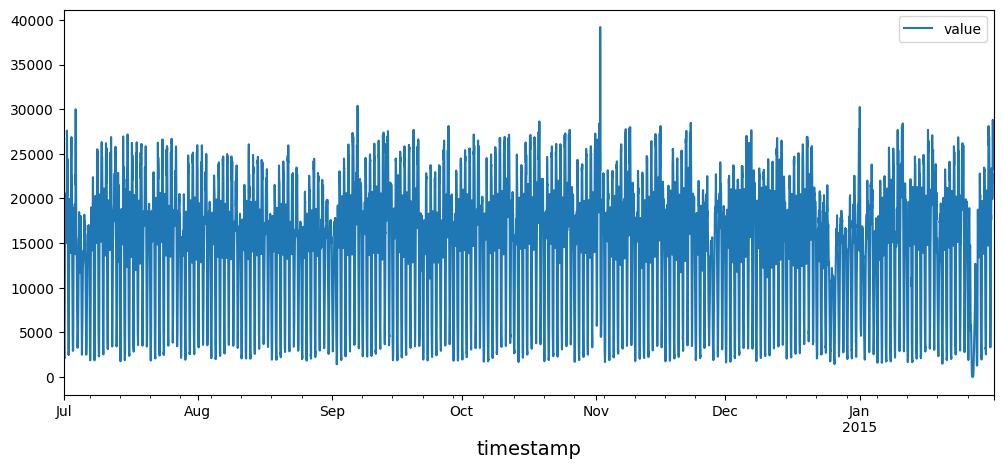

In [5]:
# To Delete
nyc_taxi.plot()

In [6]:
# To Delete
nyc_dates =  [
        "2014-11-01",
        "2014-11-27",
        "2014-12-25",
        "2015-01-01",
        "2015-01-27"
]

In [8]:
def plot_outliers(outliers, data, method='KNN',
                 halignment = 'right', 
                 valignment = 'top',
                 labels=False):

    ax = data.plot(alpha=0.6)
    
    if labels:
        for i in outliers['value'].items():
            plt.plot(i[0], i[1], 'v', markersize=8, markerfacecolor='none', markeredgecolor='k')
            plt.text(i[0], i[1]-(i[1]*0.04), f'{i[0].strftime("%m/%d")}', 
                         horizontalalignment=halignment,
                         verticalalignment=valignment)
    else:
        data.loc[outliers.index].plot(ax=ax, style='rX', markersize=9)
        
    plt.title(f'NYC Taxi - {method}')
    plt.xlabel('date'); plt.ylabel('# of passengers')
    plt.legend(['nyc taxi','outliers'])
    plt.show()

In [10]:
nyc_dates =  [
        "2014-11-01",
        "2014-11-27",
        "2014-12-25",
        "2015-01-01",
        "2015-01-27"
]
tx = nyc_taxi.resample('D').mean()
known_outliers = tx.loc[nyc_dates]

(10320, 1)
(5160, 1)
(860, 1)
(430, 1)
(215, 1)
(215, 1)
(31, 1)


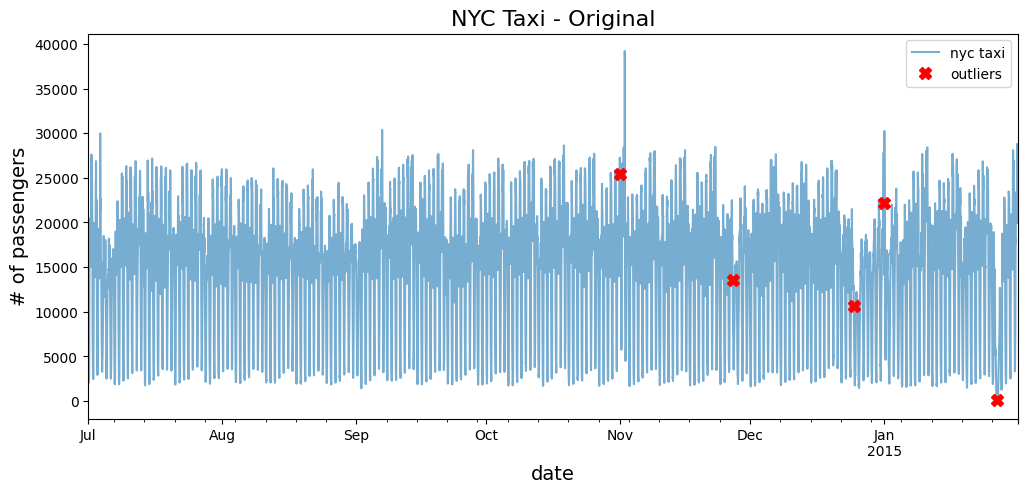

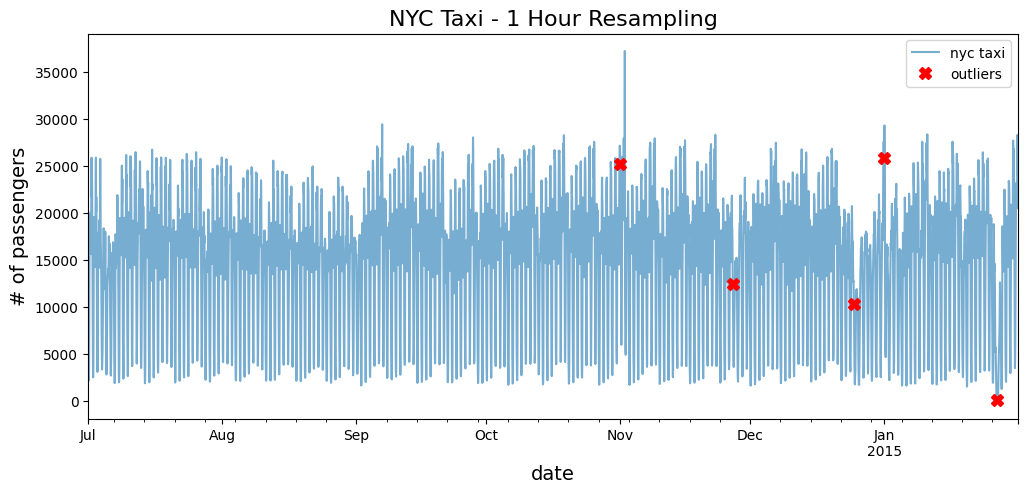

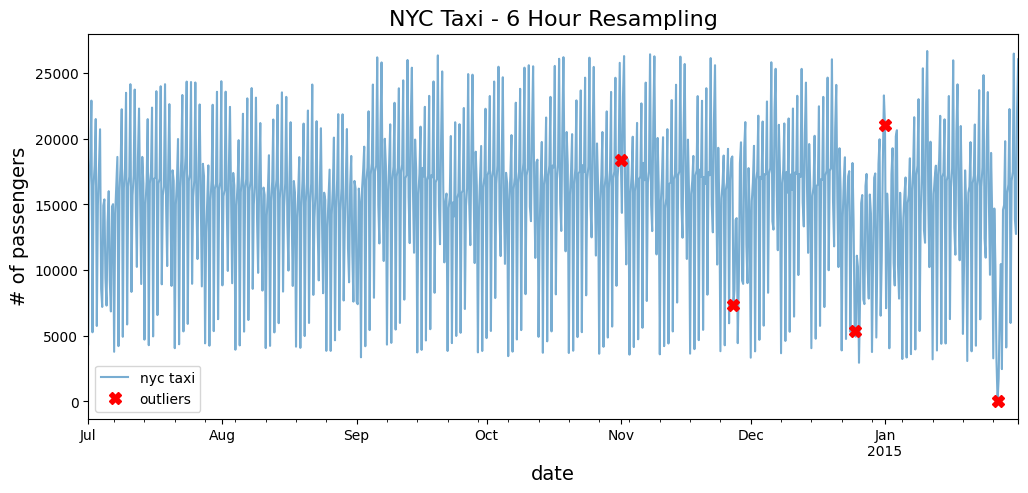

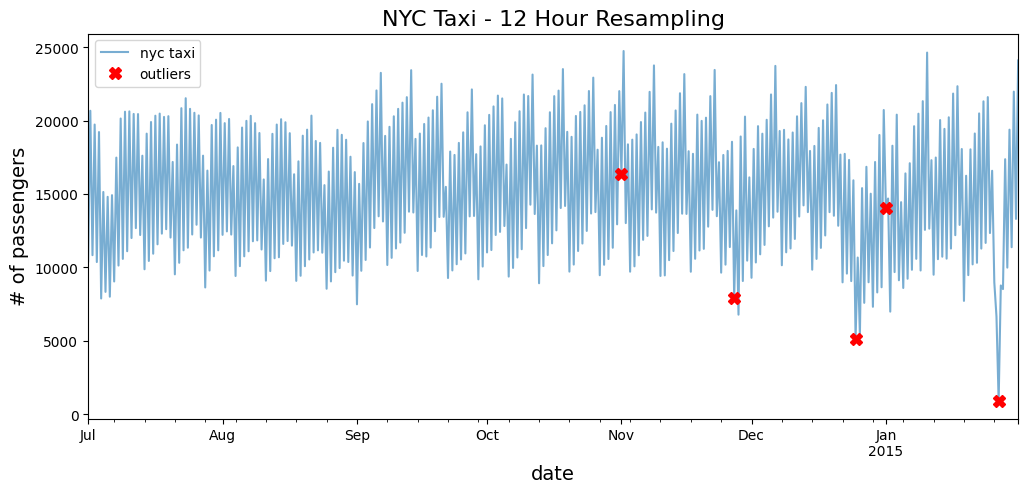

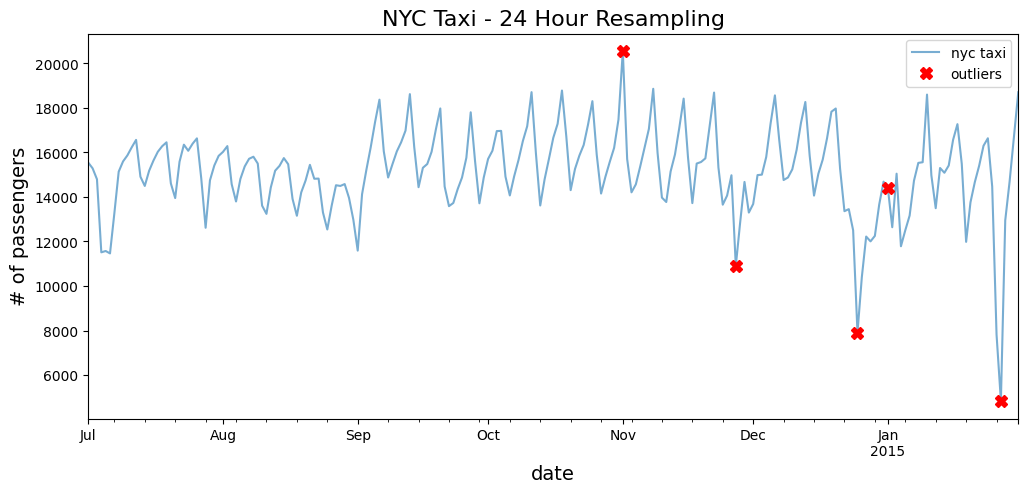

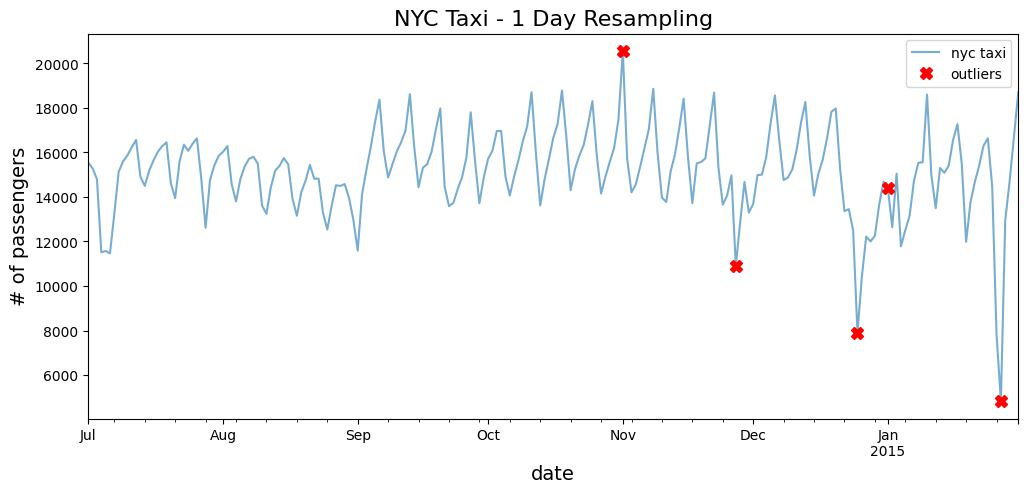

<Axes: title={'center': '1 Week Resampling'}, xlabel='timestamp'>

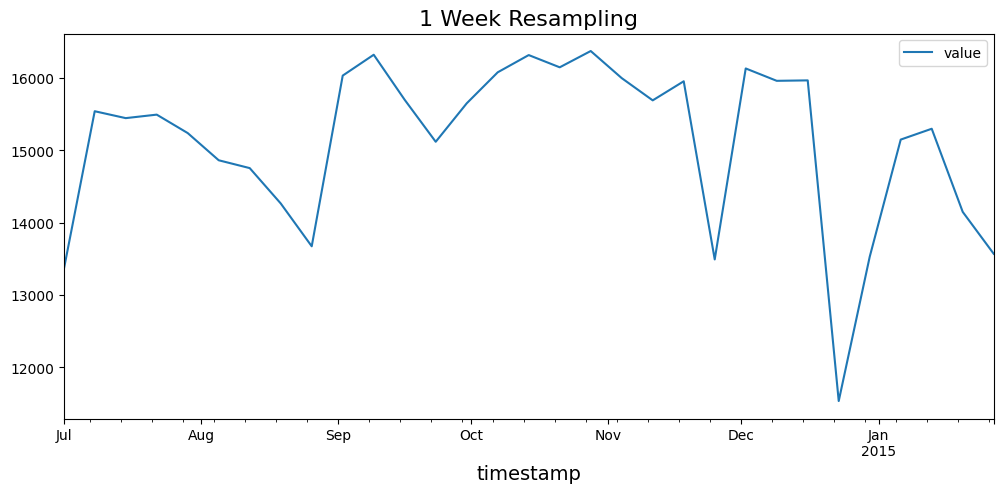

In [11]:
# To Delete 
tx_1h = nyc_taxi.resample('1H').mean()
tx_6h = nyc_taxi.resample('6H').mean()
tx_12h = nyc_taxi.resample('12H').mean()
tx_24h  = nyc_taxi.resample('24H').mean()
tx_D = nyc_taxi.resample('D').mean()
tx_W = nyc_taxi.resample('7D').mean()

print(nyc_taxi.shape)
print(tx_1h.shape)
print(tx_6h.shape)
print(tx_12h.shape)
print(tx_24h.shape)
print(tx_D.shape)
print(tx_W.shape)

plot_outliers(known_outliers, nyc_taxi, 'Original', labels=False)
plot_outliers(known_outliers, tx_1h, '1 Hour Resampling', labels=False)
plot_outliers(known_outliers, tx_6h, '6 Hour Resampling', labels=False)
plot_outliers(known_outliers, tx_12h, '12 Hour Resampling', labels=False)
plot_outliers(known_outliers, tx_24h, '24 Hour Resampling', labels=False)
plot_outliers(known_outliers, tx_D, '1 Day Resampling', labels=False)
#plot_outliers(known_outliers, tx_W, '1 Week Resampling', labels=False)

# nyc_taxi.plot(title='Original')
# tx_1h.plot(title='1 Hour Resampling')
# tx_6h.plot(title='6 Hour Resampling')
# tx_12h.plot(title='12 Hour Resampling')
# tx_24h.plot(title='24 Hour Resampling')
# tx_D.plot(title='1 Day Resampling')
tx_W.plot(title='1 Week Resampling')

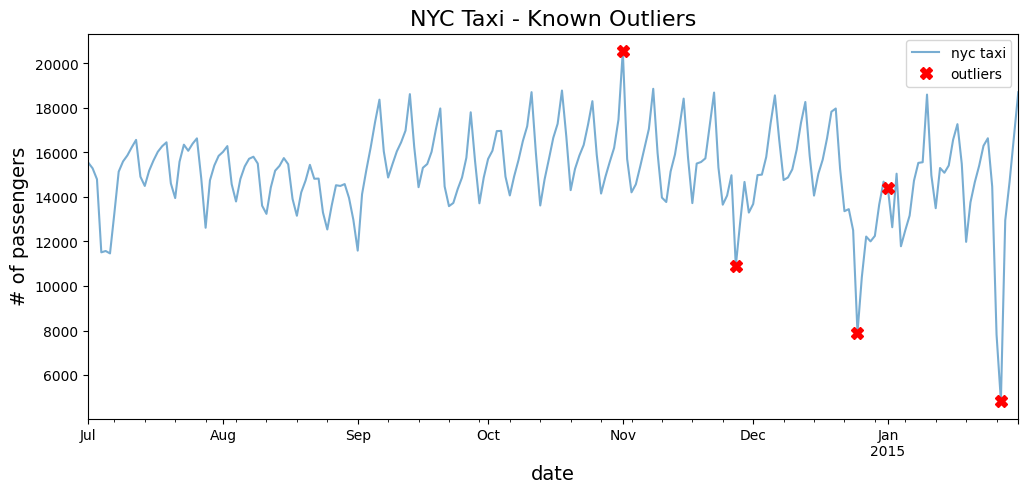

In [31]:
plot_outliers(known_outliers, tx, 'Known Outliers', labels=False)

# Detecting Outliers with PyCaret

In [12]:
from pycaret.anomaly import *
setup = setup(tx_D, session_id = 1, normalize=True)

,Description,Value
0,Session id,1
1,Original data shape,"(215, 1)"
2,Transformed data shape,"(215, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [14]:
setup.all_allowed_engines

{'kmeans': ['sklearn', 'sklearnex'], 'dbscan': ['sklearn', 'sklearnex']}

In [81]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [82]:
list_of_models = models().index.tolist()[0:8]
list_of_models

['abod', 'cluster', 'cof', 'iforest', 'histogram', 'knn', 'lof', 'svm']

In [83]:
create_model

<function pycaret.anomaly.functional.create_model(model: Union[str, Any], fraction: float = 0.05, verbose: bool = True, fit_kwargs: Optional[dict] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, **kwargs)>

In [84]:
results = {}
for model in list_of_models:
    cols = ['value', 'Anomaly_Score']
    outlier_model = create_model(model, fraction=0.03)
    print(outlier_model)
    outliers = predict_model(outlier_model, data=tx)
    outliers = outliers[outliers['Anomaly'] == 1][cols]
    outliers.sort_values('Anomaly_Score', ascending=False, inplace=True)
    results[model] = {'data': outliers, 'model': outlier_model}

ABOD(contamination=0.03, method='fast', n_neighbors=5)


CBLOFForceToDouble(alpha=0.9, beta=5, check_estimator=False,
          clustering_estimator=None, contamination=0.03, n_clusters=8,
          n_jobs=None, random_state=1, use_weights=False)


COF(contamination=0.03, method='fast', n_neighbors=20)


IForest(behaviour='new', bootstrap=False, contamination=0.03,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=1, verbose=0)


HBOS(alpha=0.1, contamination=0.03, n_bins=10, tol=0.5)


KNN(algorithm='auto', contamination=0.03, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)


LOF(algorithm='auto', contamination=0.03, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2)


OCSVM(cache_size=200, coef0=0.0, contamination=0.03, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)


In [85]:
for model in results:
    print(f'Model: {model}')
    display(results[model]['data'])

Model: abod


,value,Anomaly_Score
timestamp,,


Model: cluster


,value,Anomaly_Score
timestamp,,
2015-01-27,-5.330402,3.503979
2015-01-26,-3.786365,1.959942
2014-12-25,-3.743349,1.916926
2014-11-01,2.802000,1.047538
2014-12-26,-2.452098,0.625675
2014-12-24,-1.363545,0.455338
2015-01-05,-1.363157,0.454949


Model: cof


,value,Anomaly_Score
timestamp,,
2015-01-27,-5.330402,3.911957
2015-01-26,-3.786365,3.795352
2014-12-25,-3.743349,3.710671
2014-11-01,2.802000,3.144310
2014-11-27,-2.192533,1.735022
2014-12-19,1.391659,1.490254
2014-09-27,1.378369,1.476059


Model: iforest


,value,Anomaly_Score
timestamp,,
2015-01-27,-5.330402,0.249903
2014-11-01,2.802000,0.194263
2015-01-26,-3.786365,0.133526
2014-12-25,-3.743349,0.131992
2014-12-26,-2.452098,0.101494
2014-11-27,-2.192533,0.050560
2014-11-08,1.924467,0.020999


Model: histogram


,value,Anomaly_Score
timestamp,,
2014-11-01,2.802000,3.241689
2015-01-27,-5.330402,3.241689
2014-11-27,-2.192533,3.165679
2014-12-25,-3.743349,3.165679
2014-12-26,-2.452098,3.165679
2015-01-26,-3.786365,3.165679


Model: knn


,value,Anomaly_Score
timestamp,,
2015-01-27,-5.330402,3.137869
2015-01-26,-3.786365,1.593833
2014-12-25,-3.743349,1.587053
2014-11-01,2.802000,0.957649
2014-12-26,-2.452098,0.607556
2014-11-27,-2.192533,0.347991


Model: lof


,value,Anomaly_Score
timestamp,,
2015-01-27,-5.330402,5.513593
2015-01-26,-3.786365,3.507331
2014-12-25,-3.743349,3.454725
2014-11-01,2.802000,2.373203
2014-12-26,-2.452098,2.000520
2014-11-27,-2.192533,1.750052


Model: svm


,value,Anomaly_Score
timestamp,,
2015-01-27,-5.330402,44.186298
2015-01-26,-3.786365,42.857762
2014-12-25,-3.743349,42.806322
2014-11-01,2.802000,38.599465
2014-12-26,-2.452098,34.060365
2014-11-27,-2.192533,28.916180
2014-07-06,-1.900427,21.870762


In [86]:
results['iforest']['model']

IForest(behaviour='new', bootstrap=False, contamination=0.03,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=1, verbose=0)

In [87]:
from pycaret.anomaly import AnomalyExperiment

In [88]:
anomaly = AnomalyExperiment()

In [103]:
knn = create_model('knn', fraction=0.03)
outliers = predict_model(outlier_model, data=tx_D)

In [104]:
outliers = outliers[outliers['Anomaly'] == 1][cols]
outliers

,value,Anomaly_Score
timestamp,,
2014-07-06,-1.900427,21.870762
2014-11-01,2.802000,38.599465
2014-11-27,-2.192533,28.916180
2014-12-25,-3.743349,42.806322
2014-12-26,-2.452098,34.060365
2015-01-26,-3.786365,42.857762
2015-01-27,-5.330402,44.186298


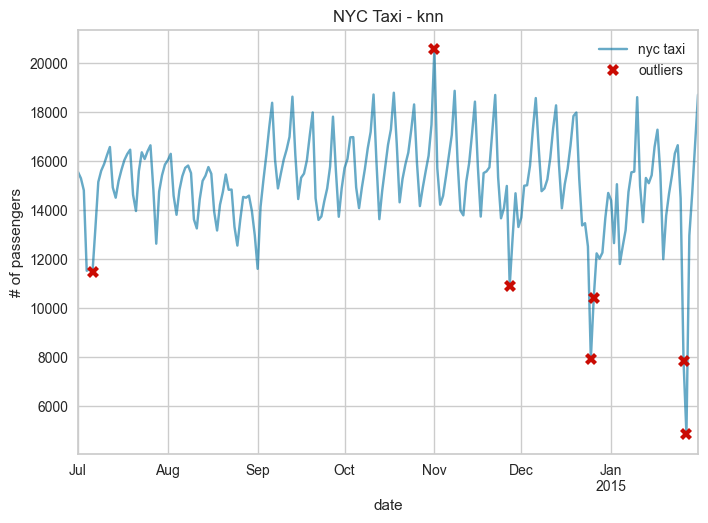

In [107]:
plot_outliers(outliers, tx_D, method='knn')

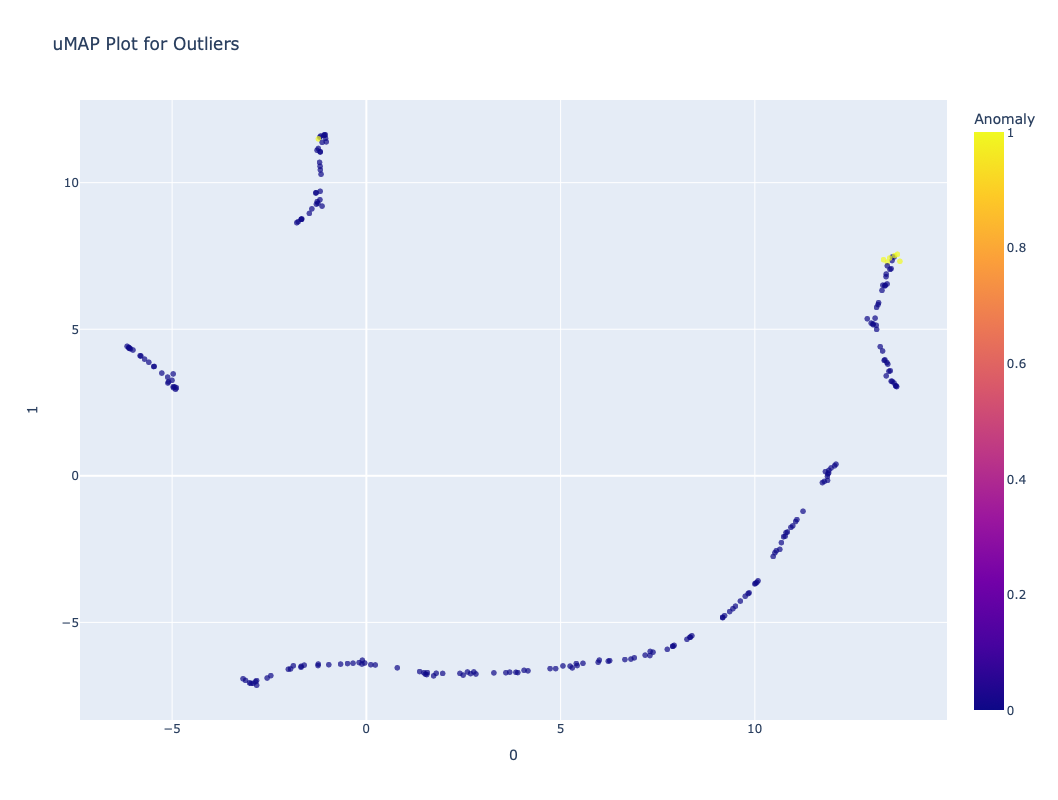

In [116]:
plot_model(knn, plot='umap')

In [113]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…